# One-way ANOVA

For the one-way ANOVA, you can use either the function in "scipy.stats". Alternatively, you can use the "statsmodel" tools: they provide more, and nicer formatted, information.

Author:  Thomas Haslwanter, Date:    April-2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

# The importance of the variance

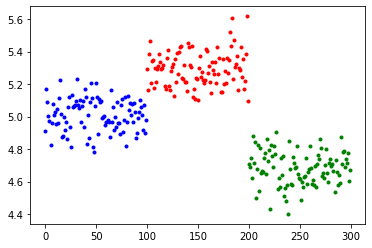

In [4]:
centers = [5, 5.3, 4.7]
std1 = 0.1
colors = 'brg'

data1 = []
for ii in range(3):
    data1.append(stats.norm(centers[ii], std1).rvs(100))
    plt.plot(np.arange(len(data1[ii]))+ii*len(data1[0]), data1[ii], '.', color=colors[ii])

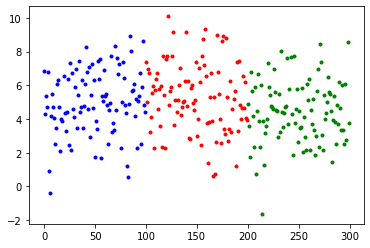

In [6]:
std2 = 2
data2 = []
for ii in range(3):
    data2.append(stats.norm(centers[ii], std2).rvs(100))
    plt.plot(np.arange(len(data1[ii]))+ii*len(data2[0]), data2[ii], '.', color=colors[ii])

**Note:** In both cases the means have the same difference, but the variance is much larger in data2!

## ANOVA with Sample Data

### Get and sort sample data

*Twenty-two patients undergoing cardiac bypass surgery were randomized to one of three ventilation groups:*
    
  - *Group I: Patients received 50% nitrous oxide and 50% oxygen mixture continuously for 24 h.*
  - *Group II: Patients received a 50% nitrous oxide and 50% oxygen mixture only dirng the operation.*
  - *Group III: Patients received no nitrous oxide but received 35-50% oxygen for 24 h.*
    
*The data show red cell folate levels for the three groups after 24h' ventilation.*

In [8]:
# Get the data
inFile = 'altman_910.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'

url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

### Levene-test
A Levene-test and/or a normality test should be made before applying a oneway ANOVA.

In [9]:
# check if the variances are equal with the "Levene"-test
(W,p) = stats.levene(group1, group2, group3)
if p<0.05:
    print('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p))

### One-way ANOVA

In [10]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)

print('The results from the one-way ANOVA, with the data from Altman 910: F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('One of the groups is significantly different.')

The results from the one-way ANOVA, with the data from Altman 910: F=3.7, p=0.04359
One of the groups is significantly different.


## Elegant alternative implementation, with pandas & statsmodels

In [11]:
df = pd.DataFrame(data, columns=['value', 'treatment'])    

# the "C" indicates categorical data
model = ols('value ~ C(treatment)', df).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN
